In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_yield = pd.read_csv("Plant_1_Generation_Data.csv")
df_weather = pd.read_csv("Plant_1_Weather_Sensor_Data.csv")
df_yield


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [4]:
df_yield = df_yield.drop(["PLANT_ID"], axis=1)
df_weather = df_weather.drop(["PLANT_ID","SOURCE_KEY"], axis=1)
#Fem un split del date time en noves columnes pels dies, hores, minuts, etc



#df_yield['DAY'] = df_yield['DATE_TIME'].dt.day
#df_yield['MONTH'] = df_yield['DATE_TIME'].dt.month
#df_yield['YEAR'] = df_yield['DATE_TIME'].dt.year
#df_yield['HOUR'] = df_yield['DATE_TIME'].dt.hour
#df_yield['MINUTE'] = df_yield['DATE_TIME'].dt.minute
#df_yield['SECOND'] = df_yield['DATE_TIME'].dt.second

#df_yield = df_yield.drop(['DATE_TIME','SECOND','YEAR'], axis=1)

In [5]:
source_keys = np.unique(df_yield['SOURCE_KEY'])

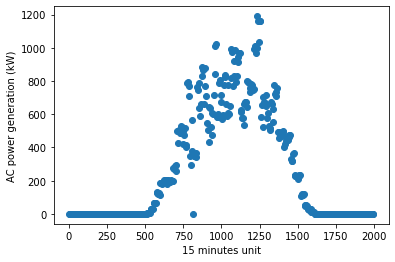

In [6]:
x = np.arange(0,2000,5)
plt.scatter(x,df_yield['AC_POWER'][x])
plt.xlabel('15 minutes unit')
plt.ylabel('AC power generation (kW)')
plt.show()

In [7]:
inverters_list = [ (df_yield.loc[df_yield['SOURCE_KEY']== inverter]).reset_index() for inverter in source_keys]
inverters_list = [inverter.drop(['index'],axis=1) for inverter in inverters_list]


for inverter in inverters_list:
    inverter['DATE_TIME'] = pd.to_datetime(inverter['DATE_TIME'])

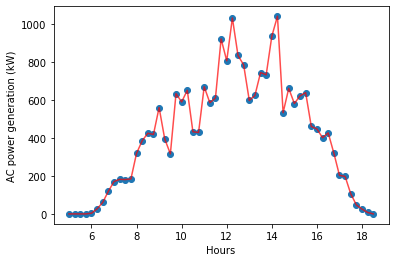

In [14]:
for i in range(1):
    x = np.arange(20,75)
    plt.scatter(x/4, inverters_list[i]['AC_POWER'][x])
    plt.plot(x/4, inverters_list[i]['AC_POWER'][x], linestyle='-', color='red', alpha=0.7, label='Connected')
plt.xlabel('Hours')
plt.ylabel('AC power generation (kW)')

plt.show()

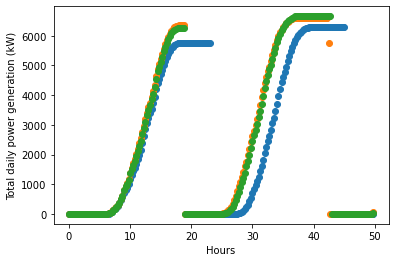

In [99]:
for i in range(3):
    x = np.arange(0,200)
    plt.scatter(x/4, inverters_list[i]['DAILY_YIELD'][x])
plt.xlabel('Hours')
plt.ylabel('Total daily power generation (kW)')

plt.show()

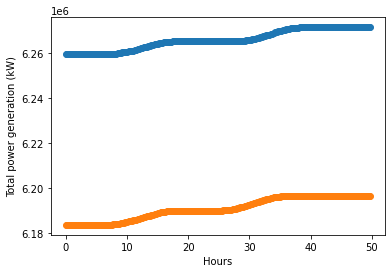

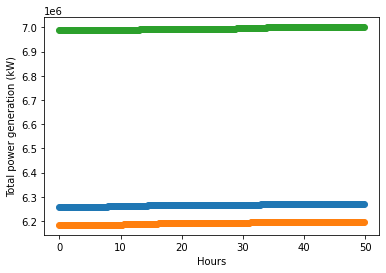

In [100]:
for i in range(2):
    x = np.arange(0,200)
    plt.scatter(x/4, inverters_list[i]['TOTAL_YIELD'][x])
plt.xlabel('Hours')
plt.ylabel('Total power generation (kW)')

plt.show()


for i in range(3):
    x = np.arange(0,200)
    plt.scatter(x/4, inverters_list[i]['TOTAL_YIELD'][x])
plt.xlabel('Hours')
plt.ylabel('Total power generation (kW)')

plt.show()

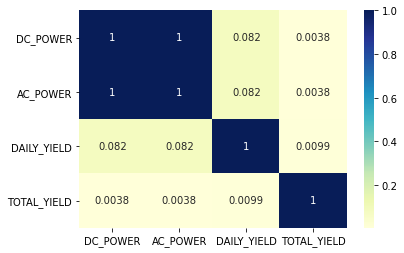

In [101]:
import seaborn as sb
dataplot = sb.heatmap(df_yield.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [163]:
df_weather['DATE_TIME'] = pd.to_datetime(df_weather['DATE_TIME'])


In [164]:

new_inverters_list = [inverter.sort_values('DATE_TIME').copy() for inverter in inverters_list]


new_inverters_list2 = [pd.merge_asof(inverter, df_weather, on='DATE_TIME',direction='nearest') for inverter in new_inverters_list]

for inverter in new_inverters_list2:
    print(inverter)
#first_df.sort_values('DATE_TIME', inplace=True)
#merged_df = pd.merge_asof(first_df, df_weather, on='DATE_TIME',direction='nearest')


               DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  \
0    2020-01-06 00:00:00  1BY6WEcLGh8j5v7       0.0       0.0        829.0   
1    2020-01-06 00:15:00  1BY6WEcLGh8j5v7       0.0       0.0          0.0   
2    2020-01-06 00:30:00  1BY6WEcLGh8j5v7       0.0       0.0          0.0   
3    2020-01-06 00:45:00  1BY6WEcLGh8j5v7       0.0       0.0          0.0   
4    2020-01-06 01:00:00  1BY6WEcLGh8j5v7       0.0       0.0          0.0   
...                  ...              ...       ...       ...          ...   
3149 2020-12-06 22:45:00  1BY6WEcLGh8j5v7       0.0       0.0       5441.0   
3150 2020-12-06 23:00:00  1BY6WEcLGh8j5v7       0.0       0.0       5441.0   
3151 2020-12-06 23:15:00  1BY6WEcLGh8j5v7       0.0       0.0       5441.0   
3152 2020-12-06 23:30:00  1BY6WEcLGh8j5v7       0.0       0.0       5441.0   
3153 2020-12-06 23:45:00  1BY6WEcLGh8j5v7       0.0       0.0       5441.0   

      TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRR

In [1]:
new_inverters_list2[0].head(500)

NameError: name 'new_inverters_list2' is not defined